# New Section

**Task 4 Displaying RGB chanel and gray scale dimensions**

Original image:Image1.jpg


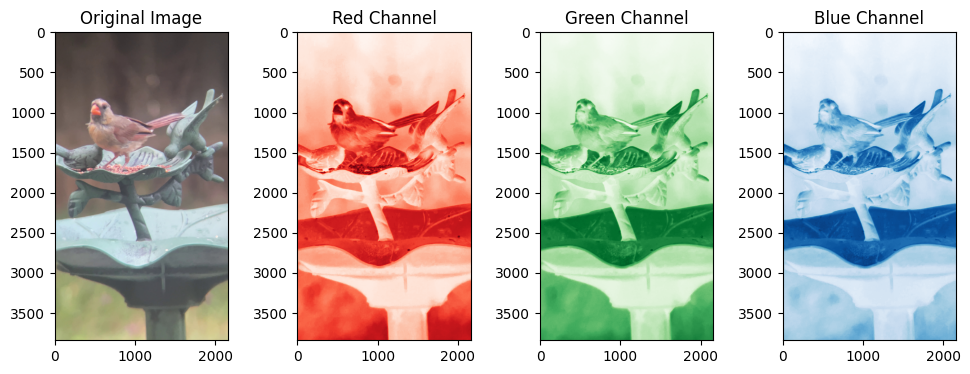

Original image:Image2.jpg


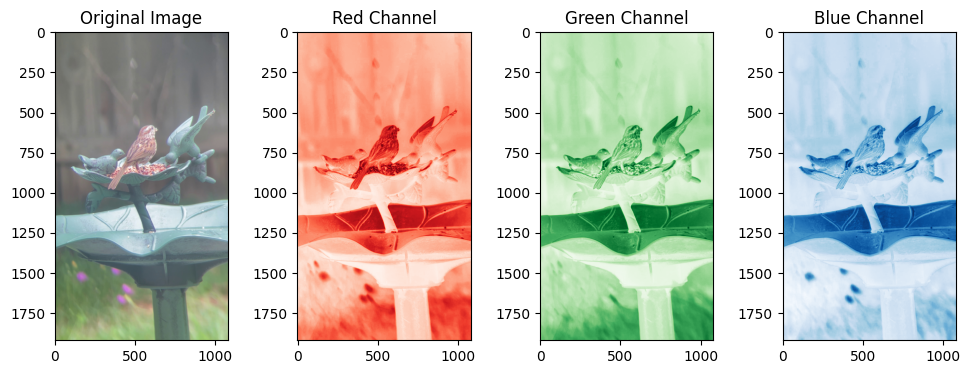

Original image:Image3.jpg


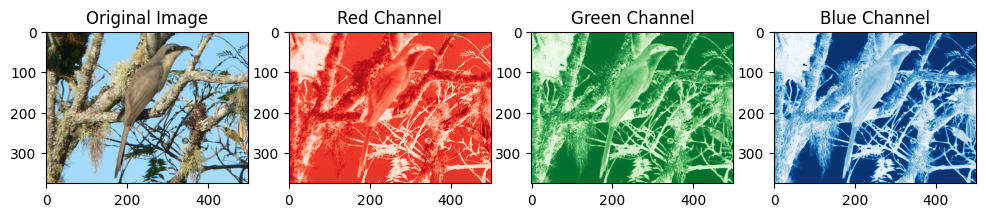

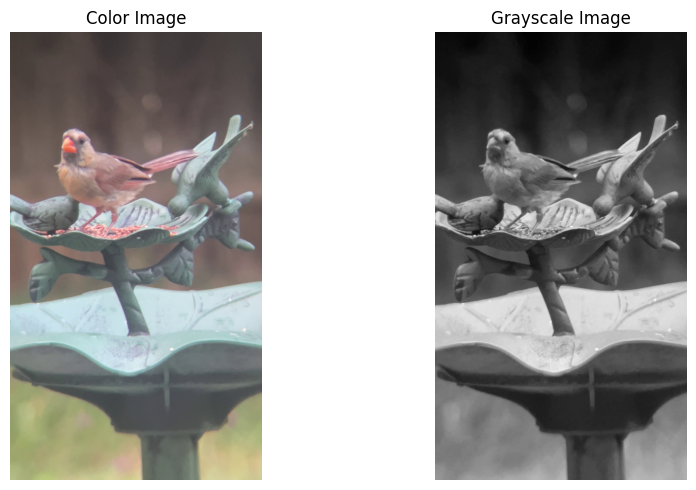

Color image dimensions (Height x Width):  3840 x 2160
Grayscale image dimensions: (Height x Width):  3840 x 2160


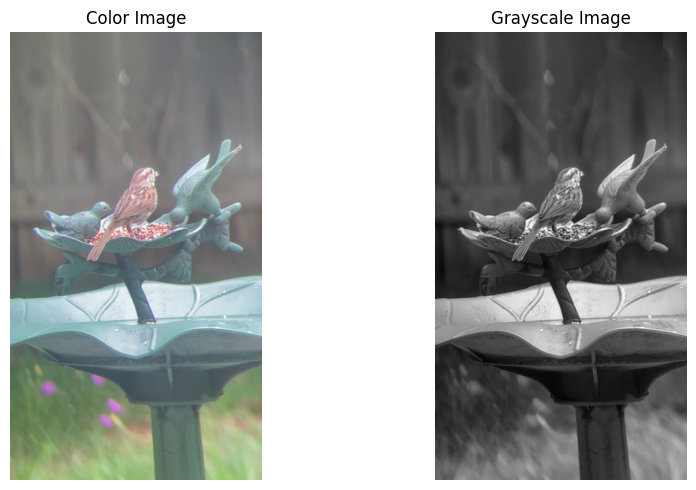

Color image dimensions (Height x Width):  1920 x 1080
Grayscale image dimensions: (Height x Width):  1920 x 1080


Color image dimensions (Height x Width):  375 x 500
Grayscale image dimensions: (Height x Width):  375 x 500


In [1]:
import cv2
from matplotlib import pyplot as plt
import os

images =[r'/content/Machine learning assignment/Image1.jpg', r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]

def read_and_display_Images(images):
    for im in images:
        read_image = cv2.imread(im,cv2.IMREAD_COLOR)
        rgb_color = cv2.cvtColor(read_image,cv2.COLOR_BGR2RGB)
        filename = os.path.basename(im)
        print(f'Original image:{filename}')
        # Display the original image
        plt.figure(figsize=(12, 4))
        plt.subplot(141)
        plt.imshow(rgb_color)
        plt.title('Original Image')

        r, g, b = cv2.split(rgb_color)

        plt.subplot(142)
        plt.imshow(r, cmap='Reds')
        plt.title('Red Channel')

        plt.subplot(143)
        plt.imshow(g, cmap='Greens')
        plt.title('Green Channel')

        plt.subplot(144)
        plt.imshow(b, cmap='Blues')
        plt.title('Blue Channel')

        plt.show()
def display_color_images_grayscale_and_dimensions(images):
    for image in images:
        read_image = cv2.imread(image,cv2.IMREAD_COLOR)
        rgb_color = cv2.cvtColor(read_image,cv2.COLOR_BGR2RGB)
        # Converting the color image to grayscale
        gray_scale_image = cv2.cvtColor(rgb_color, cv2.COLOR_BGR2GRAY)
        # Display the color and grayscale images
        plt.figure(figsize=(10, 5))
        plt.subplot(121)
        plt.imshow(rgb_color)
        plt.title('Color Image')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(gray_scale_image, cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Printing the dimensions of the image1
        print(f"Color image dimensions (Height x Width):  {rgb_color.shape[0]} x {rgb_color.shape[1]}")
        print(f"Grayscale image dimensions: (Height x Width):  {gray_scale_image.shape[0]} x {gray_scale_image.shape[1]}")



read_and_display_Images(images)
display_color_images_grayscale_and_dimensions(images)

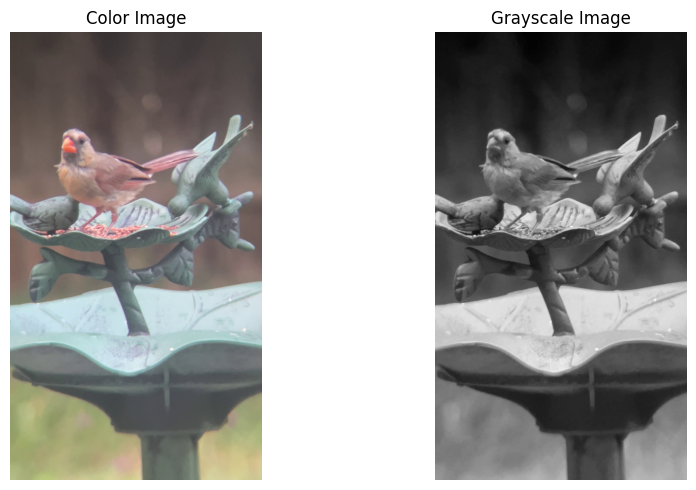

Color image dimensions (Height x Width):  3840 x 2160
Grayscale image dimensions: (Height x Width):  3840 x 2160


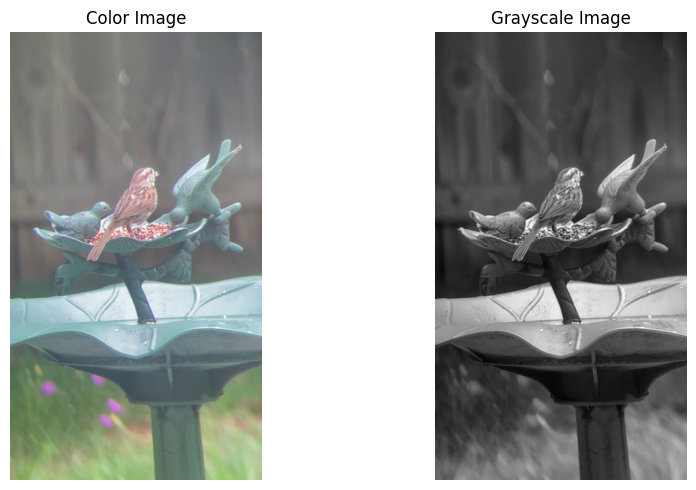

Color image dimensions (Height x Width):  1920 x 1080
Grayscale image dimensions: (Height x Width):  1920 x 1080


Color image dimensions (Height x Width):  375 x 500
Grayscale image dimensions: (Height x Width):  375 x 500


In [3]:
display_color_images_grayscale_and_dimensions(images)

**Task 5 Resizing the image**

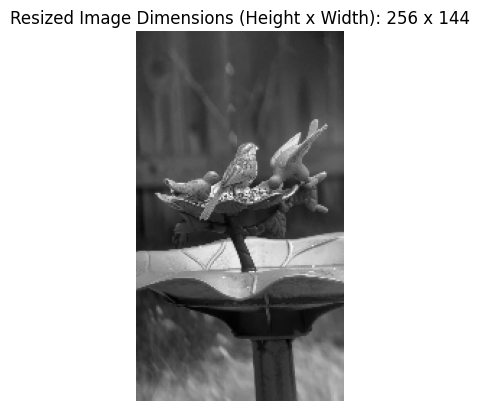

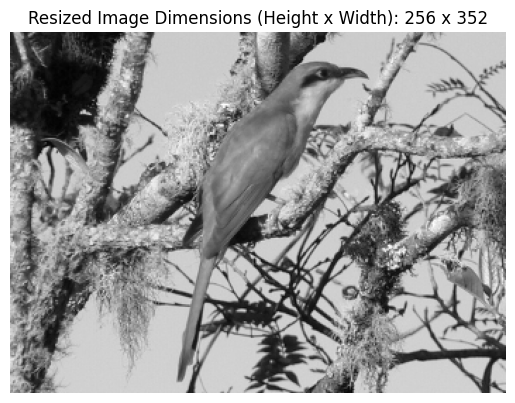

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a function to resize the grayscale image
def resizing_image(image, desired_height):
    # Get the original height and width
    original_height, original_width = image.shape[:2]

    # Calculate the new width while maintaining the aspect ratio
    aspect_ratio = original_width / original_height
    desired_width = int(desired_height * aspect_ratio)

    # Ensure the width is divisible by 16
    if desired_width % 16 != 0:
        desired_width = ((desired_width + 15) // 16) * 16

    # Resize the image using the calculated dimensions
    resized_image = cv2.resize(image, (desired_width, desired_height))

    return resized_image

# Example usage:
# Load a grayscale image (replace with your image path)
image_paths = [r'/content/Machine learning assignment/Image1.jpg', r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]
for image_path in image_paths:
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define the desired height (256 pixels)
    desired_height = 256

    # Resize the image
    resized_image = resizing_image(grayscale_image, desired_height)

    # Display the resized image and its dimensions
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Resized Image Dimensions (Height x Width): {resized_image.shape[0]} x {resized_image.shape[1]}")
    plt.axis('off')
    plt.show()


**Task 6 Generating the block feature vectors**

In [3]:
import cv2
import numpy as np
import pandas as pd


# Function to generate block-feature vectors from an image
def generate_block_feature_vectors(image, block_size=16):
    feature_vectors = []
    height, width = image.shape

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            block = image[y:y+block_size, x:x+block_size]
            if block.shape == (block_size, block_size):
                # Convert the block to a 1D vector (256 elements)
                 block_vector = block.flatten()
                 feature_vectors.append(block_vector)

    return feature_vectors

# Load your three grayscale images (replace with your image paths)
image_paths = [r'/content/Machine learning assignment/Image1.jpg',r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]
images = []

for image_path in image_paths:
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Define the desired height (256 pixels)
    desired_height = 256
    # Resize the image
    resized_image = resizing_image(grayscale_image, desired_height)
    if resized_image is not None:
        images.append(resized_image)
    else:
        print(f"Warning: Unable to access the image path{image_path}")
#for path in image_paths:
    #image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    #if image is not None:
       # images.append(image)
    #else:
       # print(f"Warning: Unable to read image at {path}")

# Assign labels to images (0, 1, 2 for the first, second, and third images)
labels = [0, 1, 2]

# Generate block-feature vectors for each image
block_size = 16
entire_feature_vectors = []
entire_labels = []

for i, image in enumerate(images):
    feature_vectors = generate_block_feature_vectors(image, block_size)
    entire_feature_vectors.extend(feature_vectors)
    entire_labels.extend([labels[i]] * len(feature_vectors))

# Create a Pandas DataFrame to store the feature vectors
df = pd.DataFrame(entire_feature_vectors)

# Add a column for labels
df['Label'] = entire_labels

# Export the DataFrame to a CSV file
df.to_csv('/content/Machine learning assignment/block_feature_vectors1.csv', index=False)

# Display the DataFrame
print(df)


       0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
0     59   60   59   60   59   58   59   59   59   60  ...   65   65   65   
1     59   59   58   58   58   58   58   59   59   60  ...   72   73   74   
2     67   68   71   73   72   71   72   72   71   70  ...   73   73   72   
3     56   56   53   53   53   53   52   53   54   53  ...   57   58   58   
4     57   58   57   59   61   61   64   64   65   66  ...   70   70   72   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
635  204  199  207  201  200  205  208  207  207  209  ...  206  206  206   
636  208  208  207  206  208  206  206  206  207  207  ...  207  206  208   
637  205  206  205  206  208  207  207  206  206  207  ...  207  208  208   
638  135   63   69   99  163  203  209  206  207  207  ...  208  207  206   
639  168   61   46   52   50  113  206  206  205  206  ...  205  207  203   

     250  251  252  253  254  255  Label  
0     67   67   68   68   68   7

**Generating the sliding block vectors.**

In [4]:
import cv2
import numpy as np
import pandas as pd

# Function to generate sliding block-feature vectors from an image
def generate_sliding_block_feature_vectors(image, block_size=16):
    feature_vectors = []
    height, width = image.shape

    for y in range(0, height - block_size + 1, 1):  # I am taking the slider as 1.
        for x in range(0, width - block_size + 1, 1):
            block = image[y:y+block_size, x:x+block_size]
            if block.shape == (block_size, block_size):
                # Convert the block to a 1D vector (256 elements)
                block_vector = block.flatten()
                feature_vectors.append(block_vector)

    return feature_vectors

# Load your three grayscale images (replace with your image paths)
image_paths = [r'/content/Machine learning assignment/Image1.jpg', r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]
images = []

for image_path in image_paths:
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Define the desired height (256 pixels)
    desired_height = 256
    # Resize the image
    resized_image = resizing_image(grayscale_image, desired_height)
    if resized_image is not None:
        images.append(resized_image)
    else:
        print(f"Warning: Unable to access the image path{image_path}")


# Assign labels to images (0, 1, 2 for the first, second, and third images)
labels = [0, 1, 2]

# Generate sliding block-feature vectors for each image
block_size = 16
entire_feature_vectors = []
entire_labels = []

for i, image in enumerate(images):
    feature_vectors = generate_sliding_block_feature_vectors(image, block_size)
    entire_feature_vectors.extend(feature_vectors)
    entire_labels.extend([labels[i]] * len(feature_vectors))

# Create a Pandas DataFrame to store the feature vectors
df = pd.DataFrame(entire_feature_vectors)

# Add a column for labels
df['Label'] = entire_labels

# Export the DataFrame to a CSV file
df.to_csv('/content/Machine learning assignment/sliding_block_feature_vectors.csv', index=False)

# Display the DataFrame
print(df)


          0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
0        59   60   59   60   59   58   59   59   59   60  ...   65   65   65   
1        60   59   60   59   58   59   59   59   60   60  ...   65   65   67   
2        59   60   59   58   59   59   59   60   60   60  ...   65   67   67   
3        60   59   58   59   59   59   60   60   60   60  ...   67   67   68   
4        59   58   59   59   59   60   60   60   60   60  ...   67   68   68   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
143390  204  207  205  208  168   61   46   52   50  113  ...   47   93  192   
143391  207  205  208  168   61   46   52   50  113  206  ...   93  192  207   
143392  205  208  168   61   46   52   50  113  206  206  ...  192  207  205   
143393  208  168   61   46   52   50  113  206  206  205  ...  207  205  207   
143394  168   61   46   52   50  113  206  206  205  206  ...  205  207  203   

        250  251  252  253  254  255  L

Generating individual block vectors.

**Task 8 Statistical descriptors**


                0           1           2           3           4           5  \
count  640.000000  640.000000  640.000000  640.000000  640.000000  640.000000   
mean   139.014062  138.095313  138.698438  138.542188  138.487500  137.885938   
std     52.602666   53.451120   54.208558   53.975779   52.865079   53.214402   
min     16.000000   16.000000   15.000000   12.000000   15.000000   15.000000   
25%    102.000000  102.000000  101.000000  101.000000  101.750000  100.000000   
50%    135.000000  131.000000  130.000000  130.000000  132.000000  132.000000   
75%    192.000000  194.250000  196.000000  195.000000  192.250000  190.250000   
max    237.000000  236.000000  237.000000  244.000000  252.000000  237.000000   

                6           7           8           9  ...         247  \
count  640.000000  640.000000  640.000000  640.000000  ...  640.000000   
mean   137.618750  137.554688  137.562500  137.206250  ...  141.023438   
std     53.492324   52.900652   52.673285   52.0

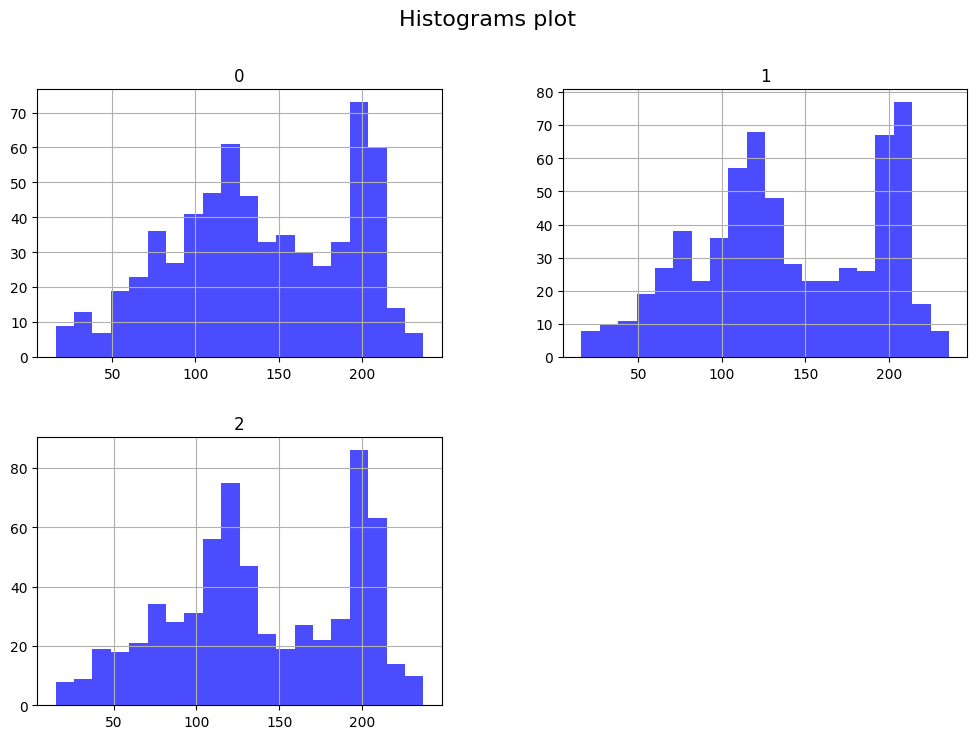

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the feature space CSV file
block_vectors_df = pd.read_csv('/content/Machine learning assignment/block_feature_vectors1.csv')
statistics_info = block_vectors_df.describe()
print(statistics_info)

# Display basic statistical information
print("Number of observations:", len(block_vectors_df))
print("Dimension of the data:", block_vectors_df.shape)
print("Mean of each feature:")
print(block_vectors_df.mean())

# Calculate statistical descriptors
mean_features = np.mean(block_vectors_df, axis=0)
std_features = np.std(block_vectors_df, axis=0)
skewness = np.mean(((block_vectors_df - mean_features) / std_features) ** 3, axis=0)
kurtosis = np.mean(((block_vectors_df - mean_features) / std_features) ** 4, axis=0)
# Select features for histogram

selected_features = [0, 1, 2]


class_counts = block_vectors_df['Label'].value_counts()
print(f"Class Distribution:\n{class_counts}")

# Check for missing values
missing_values = block_vectors_df.isnull().sum()
print("Missing values:")
print(missing_values)

# Check dataset size
dataset_size = len(block_vectors_df)
print(f"Dataset Size: {dataset_size}")

# Check feature dimensionality
feature_dimensionality = block_vectors_df.shape[1] - 1 # Exclude the 'Label' column
print(f"Feature Dimensionality: {feature_dimensionality}")

# Histograms for selected features
block_vectors_df.iloc[:, selected_features].hist(bins=20, figsize=(12, 8), color='blue', alpha=0.7)
plt.suptitle('Histograms plot', fontsize=16)
plt.show()

**Task Construct the feature space**

In [16]:
import pandas as pd
import cv2
image_paths = [r'/content/Machine learning assignment/Image1.jpg',r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]


grayscale_image_1 = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)
image_1_gray_resized = resizing_image(grayscale_image_1, desired_height)
#print(image_1_gray_resized.shape)


block_features_0_df = pd.DataFrame(generate_block_feature_vectors(image_1_gray_resized, block_size=16))
block_features_0_df['label'] = 0
print(block_features_0_df)
block_features_0_df.to_csv('/content/Machine learning assignment/image0.csv', index=False)

grayscale_image_2 = cv2.imread(image_paths[1], cv2.IMREAD_GRAYSCALE)
image_2_gray_resized = resizing_image(grayscale_image_2, desired_height)
print(image_2_gray_resized.shape)

block_features_1_df = pd.DataFrame(generate_block_feature_vectors(image_2_gray_resized,block_size=16))
block_features_1_df['label'] = 1
print(block_features_1_df)
block_features_1_df.to_csv('/content/Machine learning assignment/image1.csv', index = False)

grayscale_image_3 = cv2.imread(image_paths[2], cv2.IMREAD_GRAYSCALE)
image_3_gray_resized = resizing_image(grayscale_image_3, desired_height)
print(image_3_gray_resized.shape)

block_features_2_df = pd.DataFrame(generate_block_feature_vectors(image_3_gray_resized,block_size=16))
block_features_2_df['label'] =2
print(block_features_2_df)
block_features_1_df.to_csv('/content/Machine learning assignment/image2.csv',index = False)



       0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
0     59   60   59   60   59   58   59   59   59   60  ...   65   65   65   
1     59   59   58   58   58   58   58   59   59   60  ...   72   73   74   
2     67   68   71   73   72   71   72   72   71   70  ...   73   73   72   
3     56   56   53   53   53   53   52   53   54   53  ...   57   58   58   
4     57   58   57   59   61   61   64   64   65   66  ...   70   70   72   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
139  175  176  175  177  179  182  182  185  182  178  ...  206  206  208   
140   96   90   87   87   89   89   97   99  100  101  ...  108  108  110   
141  102  102  101  102  105  111  116  127  121  112  ...  132  135  129   
142  187  187  188  191  189  189  185  182  182  185  ...  203  203  203   
143  192  193  191  191  189  189  189  186  183  182  ...  196  196  195   

     250  251  252  253  254  255  label  
0     67   67   68   68   68   7

In [6]:
# Function to merge and randomize feature vectors
def merge_and_randomize(dataframes):
    merged_data = pd.concat(dataframes, ignore_index=True)
    random_indices = np.random.permutation(len(merged_data))
    merged_data = merged_data.iloc[random_indices]
    return merged_data

In [7]:
inputfiles = [block_features_0_df,block_features_1_df]
block_0_1_df = merge_and_randomize(inputfiles)
print(block_0_1_df)
block_0_1_df.to_csv('/content/Machine learning assignment/image01.csv',index=False)

       0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
68   161  141   99  121  123  125  173  203  184  170  ...  108  104   88   
258   91   92   94   93   94   93   93   94   96  102  ...   87   87   86   
95   222  220  219  217  210  219  220  221  221  220  ...  200  200  201   
246  120  128  137  137  206  206  202  211  213  211  ...  114  119  121   
79    97   95   95   95   95  100  102  103  107  108  ...  127  127  127   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59   207  133  129  128  125  124  123  121  121  121  ...  199  187  204   
135  157  157  157  158  159  157  157  157  157  158  ...  170  170  167   
171  116  116  116  116  114  115  115  115  113  114  ...  124  123  121   
209  115  122  128  113  158  151  149  143  135  130  ...  106  109  114   
106  158  148  149  148  145  147  148  151  153  156  ...  114  113  113   

     250  251  252  253  254  255  label  
68    87   81   85   93   97  11

In [8]:
inputfiles = [block_features_0_df,block_features_1_df,block_features_2_df]
block_0_1_2_df = merge_and_randomize(inputfiles)
print(block_0_1_2_df)
block_0_1_2_df.to_csv('/content/Machine learning assignment/image012.csv',index=False)

       0    1    2    3    4    5    6    7    8    9  ...  247  248  249  \
256  116  117  118  117  115  113  113  117  120  118  ...   80   80   80   
216   94   92   88   86   88   97  104  108  108  107  ...   95   99   99   
520   91  133  101   74   77  124  175  200  203  204  ...   43   44   39   
120   74   74   74   74   73   73   72   72   72   73  ...  162  162  135   
595  200  193  199  209  204  206  205  204  205  197  ...   91   84   77   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
477  104   71   45   41   47   41   52   99   91   82  ...  204  203  203   
90   216  215  213  216  219  220  220  220  222  221  ...  206  205  204   
200  133  131  130  128  129  131  131  132  132  132  ...  150  150  139   
378   17   16   16   12   15   19   23   27   27   21  ...  156  123   76   
263  117  116  110  108  107  114  116  116  115  113  ...  115  116  121   

     250  251  252  253  254  255  label  
256   80   81   84   85   85   8

In [27]:
import cv2
import numpy as np
import pandas as pd

# Function to generate sliding block-feature vectors from an image
def generate_block_feature_vectors(image, block_size=16):
    feature_vectors = []
    height, width = image.shape

    block_vector = []

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            block = image[y:y+block_size, x:x+block_size]
            if block.shape == (block_size, block_size):
                # Convert the block to a 1D vector (256 elements)
                block_vector = block.flatten()
                feature_vectors.append(block_vector)

    return feature_vectors

# Load your three grayscale images (replace with your image paths)
image_paths = [r'/content/Machine learning assignment/Image1.jpg', r"/content/Machine learning assignment/Image2.jpg",r"/content/Machine learning assignment/Image3.jpg"]
images = []

for path in image_paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        images.append(image)
    else:
        print(f"Warning: Unable to read image at {path}")

# Assign labels to images (0, 1, 2 for the first, second, and third images)
labels = [0, 1, 2]

# Generate sliding block-feature vectors and store in separate CSV files
block_size = 16

for image_path in image_paths:
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Define the desired height (256 pixels)
    desired_height = 256
    # Resize the image
    resized_image = resizing_image(grayscale_image, desired_height)
    print(resized_image.shape)
    if resized_image is not None:
        images.append(resized_image)
    else:
        print(f"Warning: Unable to access the image path{image_path}")

    # Display the DataFrame (optional)
    print(f"Feature vectors for image {i + 1}:")
    print(df)
    print("-" * 40)


(256, 144)
Feature vectors for image 3:
     0    1    2    3    4    5    6    7    8    9    ...  246  247  248  \
0     44   50   57  124  193  190  181  175  178  176  ...   47   95  165   
1     44   43   47   66   79   67  104  164  157   99  ...  130  104   83   
2     54   57   48   44   54   50   47   51   43   38  ...   82   69   62   
3     29   33   29   30   37   29   28   26   69   85  ...   51   47   53   
4     29   73   71   39   56   62   36   26   40   40  ...   47   38   49   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
708  206  206  207  206  207  207  207  208  209  205  ...  206  208  207   
709  204  206  206  205  206  207  208  208  207  206  ...  207  210  207   
710  207  211  206  205  211  202  189  135   67   56  ...  207  207  209   
711  207  205  207  208  207  208  207  206  203  208  ...  155   80   45   
712   45   49   54   49   62  152  208  207  205  205  ...   88   64   57   

     249  250  251  252  253  254  

**Task 10 Display feature space**

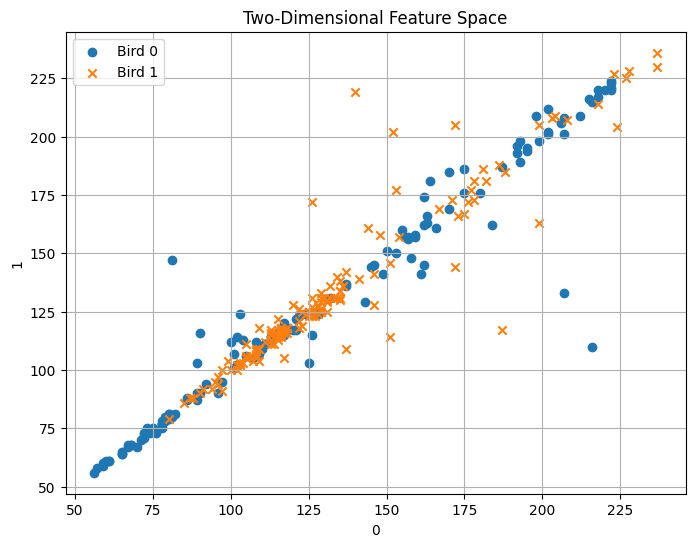

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import numpy as np

# Load data from CSV files
# Replace 'image0.csv', 'image1.csv', 'image2.csv' with your actual file paths
df0 = pd.read_csv('/content/Machine learning assignment/image0.csv')
df1 = pd.read_csv('/content/Machine learning assignment/image1.csv')
df2 = pd.read_csv('/content/Machine learning assignment/image2.csv')




# Assuming the CSV files have columns named 'feature1', 'feature2', 'feature3', and 'bird_label'
# Replace these column names with your actual feature and label column names

# Step 2: Select Two Features
features_selected_2d = [0,1]

# Step 3: Create a 2D Plot
plt.figure(figsize=(8, 6))

# Plot data from data0
plt.scatter(df0.iloc[:,features_selected_2d[0]], df0.iloc[:,features_selected_2d[1]], label='Bird 0', marker='o')

# Plot data from data1
plt.scatter(df1.iloc[:,features_selected_2d[0]], df1.iloc[:,features_selected_2d[1]], label='Bird 1', marker='x')

# Label axes and add a legend
plt.xlabel(features_selected_2d[0])
plt.ylabel(features_selected_2d[1])
plt.title('Two-Dimensional Feature Space')
plt.legend()
plt.grid(True)

# Show the 2D plot
plt.show()

# Step 4: Select Three Features
features_selected_3d = [0,1,2]

# Step 5: Create a 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data from data0
ax.scatter(df0.iloc[:,features_selected_3d[0]], df0.iloc[:,features_selected_3d[1]], df0.iloc[:,features_selected_3d[2]], label='Bird 0', marker='o')

# Plot data from data1
ax.scatter(df1.iloc[:,features_selected_3d[0]], df1.iloc[:,features_selected_3d[1]], df1.iloc[:,features_selected_3d[2]], label='Bird 1', marker='x')

# Plot data from data2
ax.scatter(df2.iloc[:,features_selected_3d[0]], df2.iloc[:,features_selected_3d[1]], df2.iloc[:,features_selected_3d[2]], label='Bird 2', marker='^')

# Label axes and add a legend
ax.set_xlabel(features_selected_3d[0])
ax.set_ylabel(features_selected_3d[1])
ax.set_zlabel(features_selected_3d[2])
ax.set_title('Three-Dimensional Feature Space')
ax.legend()
ax.grid(True)

# Show the 3D plot
plt.show()


**Task 11 accessing the folder**

In [19]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/Machine learning assignment/Birds.zip"

# Directory to extract the contents
extract_to_directory = "/content/data"

# Check if the directory already exists, if not, create it
if not os.path.exists(extract_to_directory):
    os.makedirs(extract_to_directory)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_to_directory)
print("Files extracted successfully:")
print(extracted_files)


Files extracted successfully:
['Birds']


In [20]:
import cv2
import os
import numpy as np
import pandas as pd



# Directory containing the images
image_folder = '/content/data/Birds'

# List to store feature vectors from all images
all_feature_vectors = []
all_labels = []

# Block size for feature extraction
block_size = 16

# Iterate through all images in the folder
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Filter by image file extensions
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Generate  block-feature vectors for each image
                feature_vectors = generate_block_feature_vectors(image, block_size)
                all_feature_vectors.extend(feature_vectors)

                # Assign a label based on the image file name or any other criteria
                label = 0  # Replace with logic to assign labels
                all_labels.extend([label] * len(feature_vectors))

# Create a DataFrame for the feature vectors and labels
feature_space = pd.DataFrame(all_feature_vectors)
feature_space['Label'] = all_labels

# Save the feature space to a CSV file
feature_space.to_csv('feature_space.csv', index=False)

# Display the first few rows of the feature space (optional)
print("Feature Space:")
print(feature_space.head())


Feature Space:
     0    1    2    3    4    5    6    7    8    9  ...  247  248  249  250  \
0  150  154  154  150  152  155  152  150  152  154  ...  146  152  146  145   
1  151  145  154  151  157  154  153  149  152  154  ...  149  144  146  150   
2  150  154  154  153  155  150  153  154  151  152  ...  149  143  145  146   
3  152  153  150  151  150  155  153  149  150  154  ...  144  147  147  146   
4  151  154  149  151  152  149  153  148  156  148  ...  144  149  147  146   

   251  252  253  254  255  Label  
0  148  148  146  145  147      0  
1  148  148  146  145  147      0  
2  146  144  146  146  146      0  
3  149  143  146  145  147      0  
4  144  145  144  150  148      0  

[5 rows x 257 columns]
